In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
PATH = "log/herd01_2_hour/"

In [3]:
def get_delays_and_profits(path):
    delays = {}
    for file in os.listdir(path):
        if 'HerdSlaveAgent' in file:
            try:
                df = pd.read_pickle(os.path.join(PATH,file), compression='bz2')
                delay = df.loc[df.EventType == 'DELAY', 'Event'].values[0]
                profit = df.loc[df.EventType == 'ENDING_CASH', 'Event'].values[0] - df.loc[df.EventType == 'STARTING_CASH', 'Event'].values[0]
                delays[delay] = profit
            except (IndexError, KeyError):
                continue
    return delays

In [4]:
delays = get_delays_and_profits(PATH)

In [5]:
np.asarray(sorted(delays.items()))[:, 1]

array([288296., 160855.,  92072., 166721., 170145., 238848., 119275.,
       168939., 151556., 173636., 152616., 193430., 119140., 172504.,
       160724., 121441., 136919., 162996., 108534.,  17073., 217470.,
       -17120.,  15663., 171434.,  10006.,  79944.,  24358.,  70753.,
       171981., 131666.,  17986.,  67944., -16848.,  44964.,  34978.,
       108150.,  52928.,  -4494.,  32736.,  10658.,  18061., -24520.,
        17384., -21687.,   -936.,  18591., -18259.,  38552.,  -8271.,
         7581.,  -7469.,  14274.,   -597.,  11466.,   8079.,  -5972.,
         3750.,   8202.,   1854.,  -5164.])

In [6]:
delays

{77001306: -936,
 17153185: 151556,
 66859645: 18061,
 26456311: 172504,
 20063298: 173636,
 30579654: 136919,
 64804271: 52928,
 95452600: 8202,
 94034439: -5972,
 36477357: 17073,
 987055: 288296,
 77434098: 18591,
 13575559: 168939,
 83021547: 7581,
 33734856: 162996,
 77679065: -18259,
 6148960: 92072,
 67591476: 17384,
 10678666: 238848,
 34016459: 108534,
 94979820: 3750,
 42782464: 15663,
 6882579: 166721,
 37019284: 217470,
 83645201: -7469,
 3722509: 160855,
 64825309: -4494,
 10056124: 170145,
 52248725: 131666.0,
 90725886: 11466,
 61273241: 108150.0,
 40822976: -17120,
 30181722: 121441,
 85481239: -597,
 66641349: 10658,
 96876695: -5164,
 72392489: -21687,
 81577147: -8271,
 20155881: 152616,
 93148187: 8079,
 78863890: 38552,
 12296185: 119275,
 58674230: -16848,
 42794275: 171434,
 66387857: 32736,
 55078451: 17986,
 50686885: 171981.0,
 67489832: -24520,
 95757331: 1854,
 59216310: 44964,
 49643870: 24358,
 43683157: 10006,
 60701915: 34978,
 56813833: 67944,
 23415788

In [7]:
df = pd.read_pickle(os.path.join(PATH,'HerdMasterAgent5203.bz2'), compression='bz2')
df

,EventType,Event
EventTime,,
NaT,AGENT_TYPE,HerdMasterAgent
NaT,WAKE_FREQUENCY,1e+09
NaT,STARTING_CASH,10000000
2020-06-03 00:00:00.000000000,HOLDINGS_UPDATED,{'CASH': 10000000}
2020-06-03 09:30:00.008123292,BID_DEPTH,"[(99870, 50)]"
...,...,...
2020-06-03 11:29:59.016499676,FINAL_CASH_POSITION,223736056
2020-06-03 11:29:59.016499676,MARK_TO_MARKET,-2132 ABM @ 99822 == -212820504
2020-06-03 11:29:59.016499676,MARKED_TO_MARKET,10915552


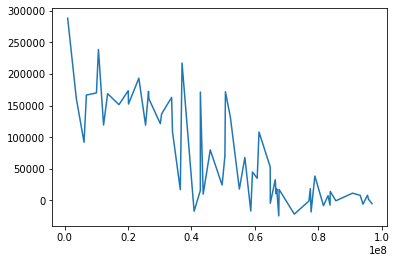

In [8]:
# python -u abides.py -c herd01 -t ABM -d 20200603 -s 1234 -l herd01_2_hour --end-time 11:30:00 --master-window 1e+9
plt.plot(np.asarray(sorted(delays.items()))[:, 0], np.asarray(sorted(delays.items()))[:, 1])